# Project 1. Game sales data analysis

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import re
import wikipediaapi
import math
from statistics import mean


In [240]:
#options

pd.set_option('display.max_rows', 50);
# set font
plt.rc("font", family = "Malgun Gothic");
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid');

option.
1. kaggle 에서 새로운 데이터파일을 가져와 하나로 합친다??
2. 데이터가 항상 풍성할 수는 없다. 제한적인 상황에서 최대한의 아웃풋을 뽑아내본다.

In [241]:
# load data
# df_vgame = pd.read_csv('vgames2.csv');
# df_vgame.head()

In [242]:
# Check missing values
# df_vgame.info()

Unnamed 를 index로 수정  
Year 항목에 결측치 다수, 타입 int로 수정  
Genre 항목 결측치 다수  
Publisher 항목 결측치 다수  
Sales 항목들 numeric 으로 수정  


In [243]:
# vgame_copy = df_vgame.copy();

In [244]:
# Drop Unnamed
# vgame_copy = vgame_copy.drop("Unnamed: 0",axis=1);

In [245]:
# vgame_copy.info()

In [246]:
# year_null = vgame_copy[vgame_copy.Year.isnull()];
# year_null.shape 

In [247]:
# wikipedia 크롤링 해 결측치 채우기

# import wiki_crawler
# import importlib
# importlib.reload(wiki_crawler)

In [248]:
# 모듈 초기화
# wc = wiki_crawler.WikiCrawler();
# 크롤링
# df_result = wc.fill_all(year_null);
# df_result.head()


In [249]:
# 크롤링 한 데이터 합치기

# result_copy = df_result.copy();
# result_copy
# vgame_copy['Year'] = vgame_copy['Year'].astype('str');
# for index in result_copy.index:
#     vgame_copy.loc[index,['Year','Genre','Publisher']] = result_copy.loc[index,['Year','Genre','Publisher']];

# vgame_copy.iloc[31]

In [250]:
# 새로운 파일 생성
# vgame_copy.to_csv('vgames_made_up.csv');

In [251]:
# 결측치 채운 데이터 셋 새로 로드
# df_vgame = pd.read_csv('vgames_0.csv');
# df_vgame.head()

In [252]:
# Drop Unnamed
# vgame_copy = df_vgame.drop("Unnamed: 0",axis=1);
# vgame_copy.head()

In [253]:
# 이외의 결측치는 제거
# vgame_copy = vgame_copy.dropna();
# vgame_copy.shape

In [254]:
# 이상치 탐색

# df_nulls = vgame_copy[vgame_copy.Year.isnull() | vgame_copy.Genre.isnull() |vgame_copy.Publisher.isnull()];
# index = vgame_copy[vgame_copy.Name.duplicated()].index
# vgame_copy.loc[index].sort_values('Name')

# vgame_copy.Year.value_counts()

In [255]:
# Remove .0
# astype int
# vgame_0 = vgame_copy.query("Year.str.contains(r'\d{4}')");
# vgame_0.Year = vgame_0.Year.str.replace(r"\.\d","").astype(int);
# vgame_0.info()



In [256]:
# Remove " game"
# vgame_0.Genre = vgame_0.Genre.str.replace(r" game","");

In [257]:
# merge all role playings
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)role).*","RPG");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rpg).*","RPG");

In [258]:
# merge all simulations
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)simul).*","Simulation");

In [259]:
# merge all shooters
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)shoot).*","Shooter");

In [260]:
# merge all strategies
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)strat).*","Strategy");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)tact).*","Strategy");

In [261]:
# merge all adventures
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)adven).*","Adventure");

In [262]:
# merge all platforms

# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)platform).*","Platform");

In [263]:
# merge all racings
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rac).*","Racing");

In [264]:
# merge all actions
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)action).*","Action");

In [265]:
# merge others
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rhythm).*","Rhythm");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)horror).*","Adventure");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)party).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)unknown).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)beat).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)music).*","Rhythm");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)stealth).*","Action");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)vehicul).*","Action");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)board).*","Strategy");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)manage).*","Simulation");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)various).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)tile).*","Puzzle");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)snow).*","Sports");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)hack).*","Role-Playing");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)break).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)fit).*","Sports");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)otome).*","Simulation");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)slot).*","Misc");

In [266]:
# print = vgame_0.Genre.value_counts();

In [267]:
# Save
# vgame_1 = vgame_0.copy();
# vgame_1.to_csv('vgames_1.csv');

In [268]:
# dataset load
# vgame_1 = pd.read_csv('vgames_1.csv');
# vgame_1.head()

In [269]:
# vgame_1 = vgame_1.drop("Unnamed: 0",axis=1);
# vgame_1.info()

In [270]:
# Unify units
# vgame_1.Other_Sales.value_counts()

In [271]:
# Modulise method that converts numbers
# unit convert method import

# import unit_converter as uc
# import importlib
# importlib.reload(unit_converter);


In [272]:
# convert all sales numbers
# def func(f):
#     return uc.convert_unit(f, base_unit='M',out_type=int);
# vgame_1.NA_Sales = vgame_1.NA_Sales.map(func);
# vgame_1.EU_Sales = vgame_1.EU_Sales.map(func);
# vgame_1.JP_Sales = vgame_1.JP_Sales.map(func);
# vgame_1.Other_Sales = vgame_1.Other_Sales.map(func);

In [273]:
# add total sales
# vgame_1['Total_Sales'] = vgame_1.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1);
# vgame_1.head()

In [274]:
# reset index
#vgame_1 = vgame_1.reset_index(drop=True);

In [275]:
# save
# vgame_2 = vgame_1.copy();
# vgame_2.to_csv('vgames_2.csv');

In [276]:
# dataset load
# vgame_2 = pd.read_csv('vgames_2.csv');
# vgame_2.head()

In [277]:
# vgame_2 = vgame_2.drop("Unnamed: 0",axis=1);

In [278]:
# clasify console, PC, mobile

# def classify_device(df):
#     hhc = ['DS','PSP','GBA','3DS','PSV','GB','WS','GG'];
#     df_copy = df.copy();
#     devices = [];

#     for index, x in enumerate(vgame_2.Platform):
#         if x in hhc:
#             devices.append('HHC');
#         elif x == 'PC':
#             devices.append('PC');
#         else:
#             devices.append('Console');
    
#     if df_copy.shape[0] == len(devices):            
#         df_copy['Device_Type'] = devices;
    
#     return df_copy;


# def classify_company(df):
#     nintendo = ['DS','Wii','GBA','GC','3DS','N64','SNES','WiiU','GB','NES'];
#     sony = ['PS2','PS3','PSP','PS','PSV','PS4'];
#     MS = ['X360','XB','XOne'];
#     sega = ['SAT','DC','GEN','SCD','GG'];
#     atari = ['2600'];
#     SNK = ['NG'];
#     bandai = ['WS'];
#     panasonic = ['3DO'];
#     NEC = ['TG16','PCFX'];
    
#     df_copy = df.copy();
#     company = [];

#     for index, x in enumerate(vgame_2.Platform):
#         if x in nintendo:
#             company.append('Nintendo');
#         elif x in sony:
#             company.append('Sony');
#         elif x in MS:
#             company.append('Microsoft');
#         elif x in sega:
#             company.append('SEGA');
#         elif x in atari:
#             company.append('Atari');
#         elif x in SNK:
#             company.append('SNK');
#         elif x in bandai:
#             company.append('Bandai');
#         elif x in panasonic:
#             company.append('Panasonic');
#         elif x in NEC:
#             company.append('NEC');
#         else:
#             company.append('PC');
    
#     if df_copy.shape[0] == len(company):
#         df_copy['Platform_Company'] = company;
        
#     return df_copy;


In [279]:
# Add device type and company
# vgame_2 = classify_device(vgame_2);
# vgame_2 = classify_company(vgame_2);
# vgame_2.head()

In [280]:
# reorder columns
# columns_order = ['Name','Year','Genre','Publisher','Platform','Platform_Company','Device_Type','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'];
# vgame_2 = vgame_2[columns_order];

In [281]:
# Save
# vgame_3 = vgame_2.copy();
# vgame_3.to_csv('vgames_3.csv');


In [282]:
# dataset load
# vgame_3 = pd.read_csv('vgames_3.csv',index_col=0);
# vgame_3.head()

In [283]:
# trim before 1980 and after 2017
# make up new data set
# vgame_4 = vgame_3[(vgame_3.Year >= 1980) & (vgame_3.Year < 2017)];
# vgame_4.to_csv('vgames_4.csv');


In [284]:
vgame_4 = pd.read_csv('vgames_4.csv',index_col=0);
vgame_4.head()

,Name,Year,Genre,Publisher,Platform,Platform_Company,Device_Type,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,DS,Nintendo,HHC,40000,0,0,0,40000
1,The Munchables,2009,Action,Namco Bandai Games,Wii,Nintendo,Console,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,PSP,Sony,HHC,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,DS,Nintendo,HHC,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,PS3,Sony,Console,120000,90000,0,40000,250000


In [285]:
# ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
# current_values = plt.gca().get_xticks()
# plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
# plt.hist(vgame_3.NA_Sales[vgame_3.NA_Sales > 10000000]);
# sns.boxplot(x=vgame_3.Other_Sales);
# sns.histplot(data=vgame_3,x='Name',y='NA_Sales');

In [286]:
# wikipedia 크롤링 해 결측치 채우기

# import wiki_crawler
# import importlib
# importlib.reload(wiki_crawler)

# 모듈 초기화
# wc = wiki_crawler.WikiCrawler();

In [287]:
# 크롤링
# list_mode = wc.search_mode(vgame_3);
# temp = vgame_3.loc[:500];
# temp['mode'] = wc.search_mode(vgame_3);
# temp.to_csv('mode_0_500.csv');
# temp.head(10)


1. 지역에 따라선호하는 게임 장르가 다를까?

In [288]:
# 북미 판매량 확인

# 전체년도
na_genre = vgame_4[['Genre','NA_Sales']];

# na_genre_sum = na_genre.groupby('Genre').sum().sort_values('NA_Sales',ascending=False);
# na_genre_mean = na_genre.groupby('Genre').mean().sort_values('NA_Sales',ascending=False);
temp = na_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
temp.columns = col_li;

NA_mean = temp.loc[:,'NA_Sales_mean'].sort_values(axis=0,ascending=False);
NA_max = temp.loc[:,'NA_Sales_max'].sort_values(axis=0,ascending=False);
NA_releases = temp.loc[:,'NA_Sales_count'].sort_values(axis=0,ascending=False);


In [289]:
# 유럽 판매량 확인

# 전체년도
eu_genre = vgame_4[['Genre','EU_Sales']];

temp = eu_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
temp.columns = col_li;

EU_mean = temp.loc[:,'EU_Sales_mean'].sort_values(axis=0,ascending=False);
EU_max = temp.loc[:,'EU_Sales_max'].sort_values(axis=0,ascending=False);
EU_releases = temp.loc[:,'EU_Sales_count'].sort_values(axis=0,ascending=False);


In [290]:
# 일본 판매량 확인

# 전체년도
jp_genre = vgame_4[['Genre','JP_Sales']];

temp = jp_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
temp.columns = col_li;

JP_mean = temp.loc[:,'JP_Sales_mean'].sort_values(axis=0,ascending=False);
JP_max = temp.loc[:,'JP_Sales_max'].sort_values(axis=0,ascending=False);
JP_releases = temp.loc[:,'JP_Sales_count'].sort_values(axis=0,ascending=False);


In [291]:
# 기타지역 판매량 확인

# 전체년도
other_genre = vgame_4[['Genre','Other_Sales']];

temp = other_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
temp.columns = col_li;

Other_mean = temp.loc[:,'Other_Sales_mean'].sort_values(axis=0,ascending=False);
Other_max = temp.loc[:,'Other_Sales_max'].sort_values(axis=0,ascending=False);
Other_releases = temp.loc[:,'Other_Sales_count'].sort_values(axis=0,ascending=False);

In [292]:
# 전체 판매량 확인

# 전체년도
total_genre = vgame_4[['Genre','Total_Sales']];

temp = total_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
temp.columns = col_li;

Total_mean = temp.loc[:,'Total_Sales_mean'].sort_values(axis=0,ascending=False);
Total_max = temp.loc[:,'Total_Sales_max'].sort_values(axis=0,ascending=False);
Total_releases = temp.loc[:,'Total_Sales_count'].sort_values(axis=0,ascending=False);

In [293]:
def set_colors(df):
    colors = [];
    for x in df.index:
        if   x == 'Action':     colors.append('tab:blue');
        elif x == 'Sports':     colors.append('tab:orange');
        elif x == 'Misc':       colors.append('tab:gray');
        elif x == 'RPG':        colors.append('tab:green');
        elif x == 'Adventure':  colors.append('tab:purple');
        elif x == 'Shooter':    colors.append('gold');
        elif x == 'Racing':     colors.append('tab:pink');
        elif x == 'Platform':   colors.append('tab:red');
        elif x == 'Simulation': colors.append('tab:olive');
        elif x == 'Fighting':   colors.append('tab:cyan');
        elif x == 'Strategy':   colors.append('slateblue');
        elif x == 'Puzzle':     colors.append('tab:brown'); 
        else : colors.append('white'); 
    return colors;

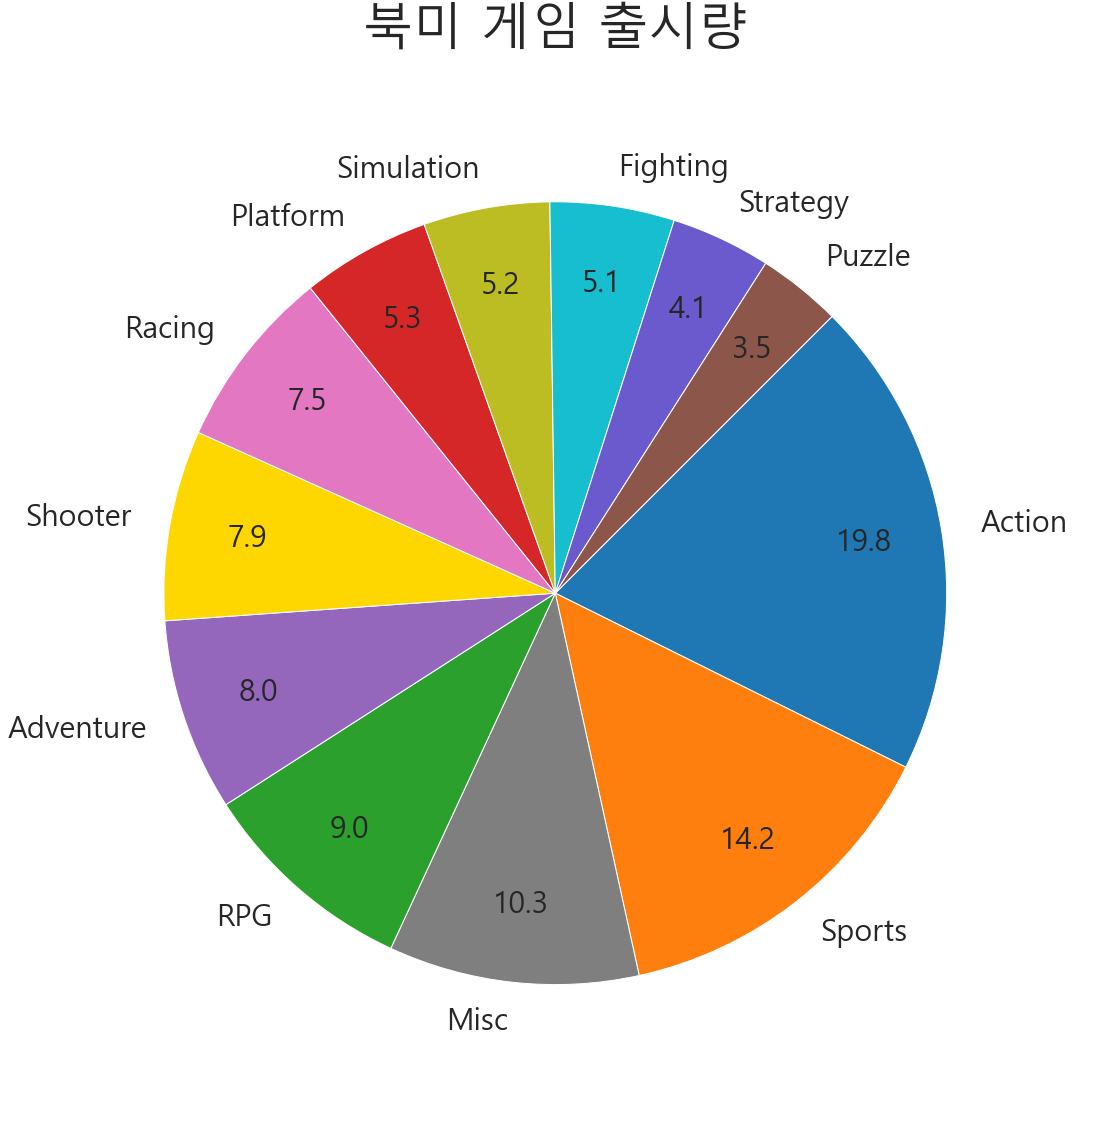

In [294]:
# NA Releases

# plt.style.use('fivethirtyeight');
# plt.style.use('greyscales');


#create pie chart
# sns.color_palette('colorblind');
# colors = sns.color_palette("tab10");
# colors = sns.color_palette("rocket_r");
# colors = sns.color_palette("yellow");
# colors = ['silver', 'gold', 'whitesmoke', 'lightgray'];
# colors = [];
exp = [];
colors = set_colors(NA_releases);

# for i,x in enumerate(NA_releases,1):
    # exp.append((count.shape[0]-i)*0.005);

    

    # PacMan    
    # if 1 <= i <= 1:
    #     colors.append('black');
    #     exp.append(1.2);
    # else : 
    #     colors.append('gold');
    #     exp.append(0);
        
    # exp.append((count.shape[0]-i)*-0.05);
    # exp.append(i*0.08);
    # exp.append((i%2)*-1.9);
    # exp.append(0);

plt.figure(figsize=(20,20));
# plt.title('NA game releases',fontdict={'fontsize' : 50});
plt.title('북미 게임 출시량',fontdict={'fontsize' : 50});

plt.pie(x=NA_releases.values,
        labels=NA_releases.index,
        autopct='%.1f',
        textprops={'fontsize': 30},
        labeldistance=1.1,
        center=(0,0),
        radius=0.9,
        startangle=45,
        counterclock=False,
        pctdistance=0.8,
        #explode=exp,
        colors=colors);

# plt.savefig('myfigure.png', dpi=300);
plt.show()


In [295]:
gn_loc = vgame_4[['Genre','NA_Sales']];
temp = gn_loc.groupby(['Genre']).agg(['mean', 'max', 'count']);
print(temp.columns);
col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
print(col_li);
temp.columns = ['mean','max','count'];
temp.head()

MultiIndex([('NA_Sales',  'mean'),
            ('NA_Sales',   'max'),
            ('NA_Sales', 'count')],
           )
['NA_Sales_mean', 'NA_Sales_max', 'NA_Sales_count']


,mean,max,count
Genre,,,
Action,265075.686129,9630000,3237
Adventure,85789.068514,6160000,1299
Fighting,264152.742243,6750000,838
Misc,237719.193720,14970000,1688
Platform,511931.033333,29080000,870


In [296]:
def create_barplot_by_genre(data,x,order):
    
    # 전체년도
    gn_loc = data[['Genre',x]];

    group = gn_loc.groupby(['Genre']).agg(['mean', 'max', 'count','median']);
    group.columns = ['Mean','Max','Count','Median'];

    sr_temp = None;
    if order == 'mean':
        sr_temp = group.loc[:,'Mean'].sort_values(axis=0,ascending=False);
    elif order == 'max':
        sr_temp = group.loc[:,'Max'].sort_values(axis=0,ascending=False);
    elif order == 'count':
        sr_temp = group.loc[:,'Count'].sort_values(axis=0,ascending=False);
    elif order == 'median':
        sr_temp = group.loc[:,'Median'].sort_values(axis=0,ascending=False);
    
    df_temp = pd.DataFrame(sr_temp);

    plt.close('all');
    plt.figure(figsize=(20,10));

    # set color
    colors = set_colors(sr_temp);

    #create barplot chart
    sns.barplot(data=data,
                y='Genre',
                x=x,
                estimator=mean,
                palette=colors, 
                order=df_temp.index,
                ci=0,
                );

    # plt.title('북미지역 장르별 평균 판매량',fontdict={'fontsize' : 50});
    plt.title(str(x + '_' + order),fontdict={'fontsize' : 50});

    # set fontsize
    # sns.set(font_scale = 2);
    plt.rc('xtick', labelsize=20); 
    plt.rc('ytick', labelsize=20);
    plt.tick_params(labelleft=False, left=False);

    # set xtick
    xlim = sr_temp.max();
    headroom = xlim * 0.2;
    plt.xlim(0,xlim + headroom);

    # put comma
    current_values = plt.gca().get_xticks();
    plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);

    # annotation
    y_offset = 0.15;
    x_offset = -70000;
    for i ,values in enumerate(zip(sr_temp.items())):
        plt.text(x=values[0][1] + 1000, y=i + y_offset,s=values[0][0]);
        # plt.text(x=values[0][1] + x_offset, y=i + y_offset,s=int(values[0][1]));

    # plt.savefig('myfigure.png', dpi=300);    
    plt.show()

C:\Users\TESB\AppData\Local\Temp\ipykernel_17816\2894948320.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


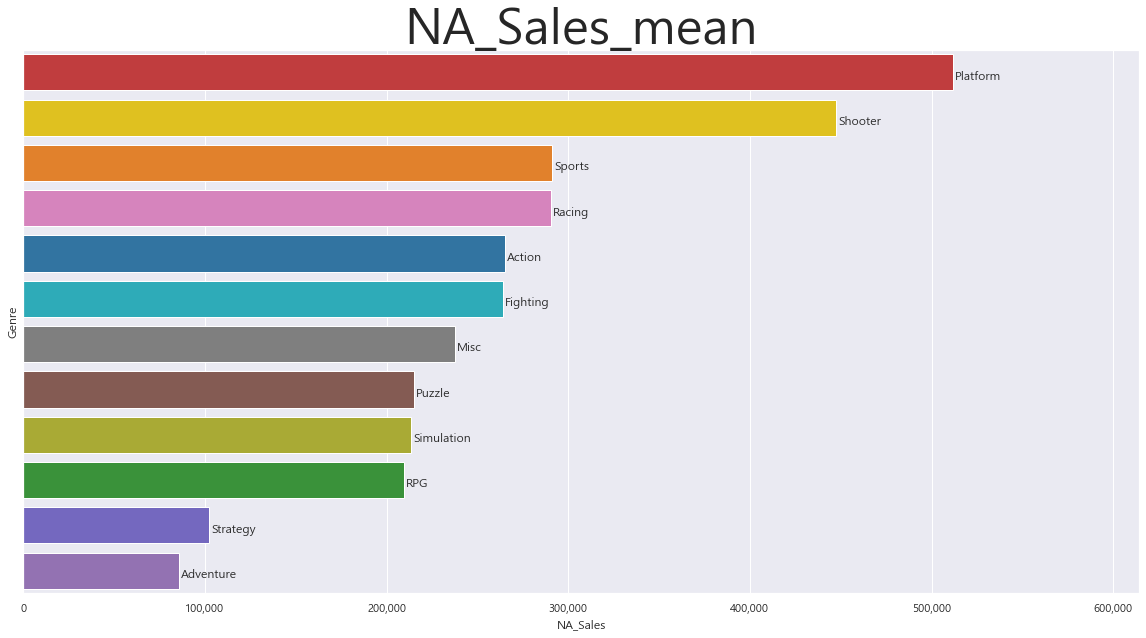

In [297]:
# NA Sales mean
create_barplot_by_genre(vgame_4,x='NA_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_17816\2894948320.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


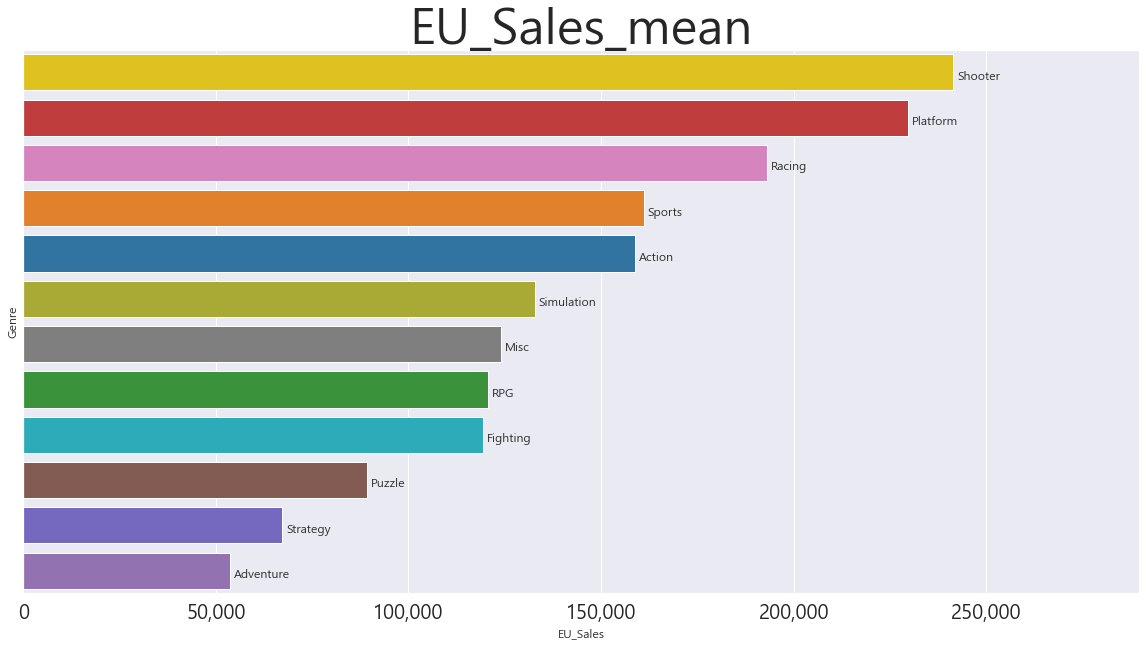

In [298]:
# EU Sales mean
create_barplot_by_genre(vgame_4,x='EU_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_17816\2894948320.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


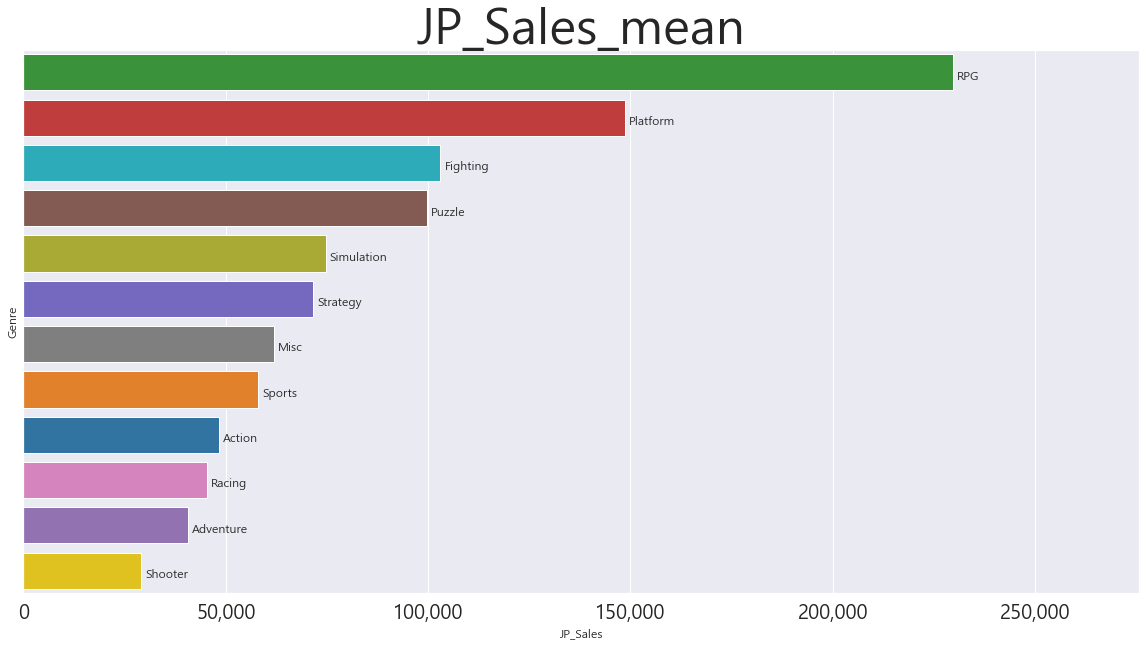

In [299]:
# JP Sales mean
create_barplot_by_genre(vgame_4,x='JP_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_17816\2894948320.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


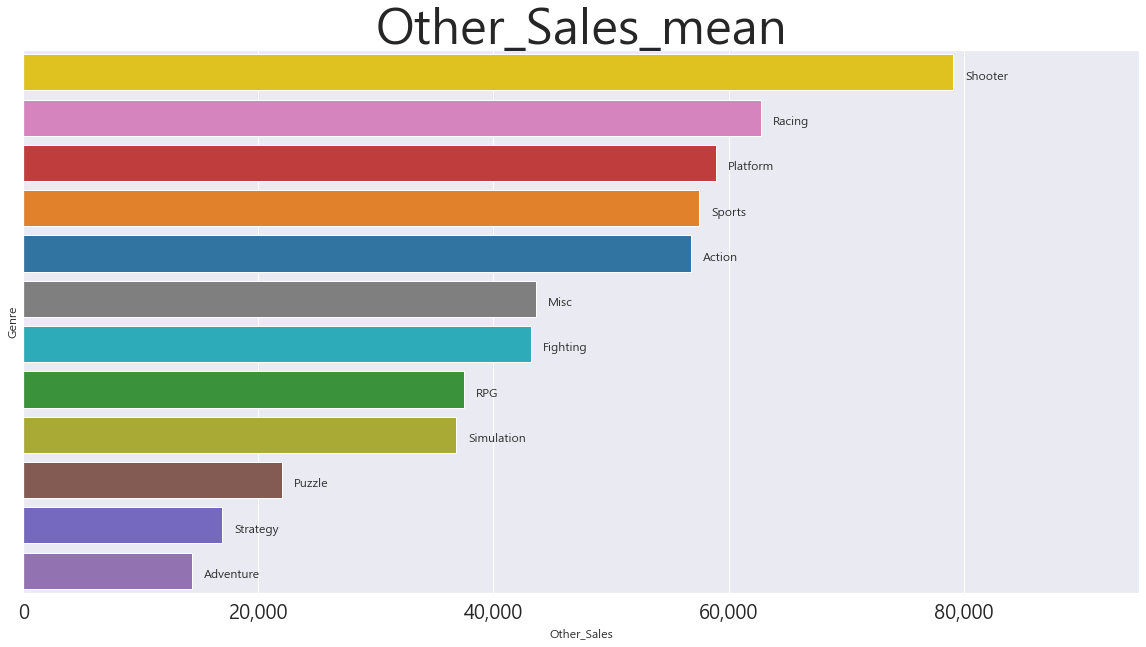

In [300]:
# Other Sales mean
create_barplot_by_genre(vgame_4,x='Other_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_17816\2894948320.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


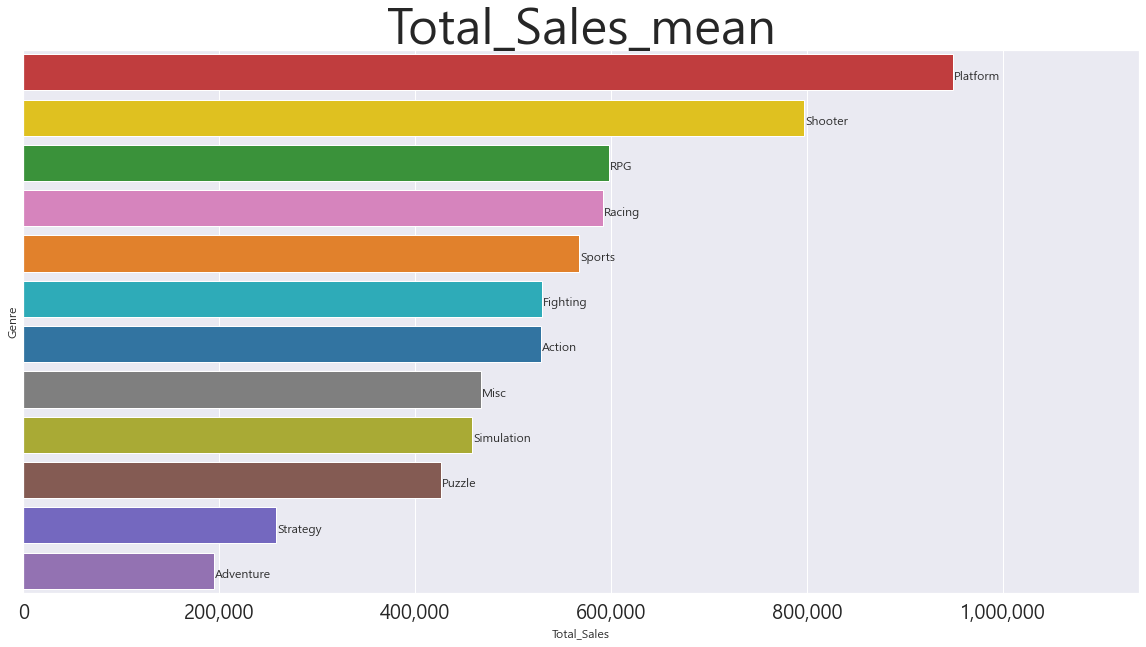

In [301]:
# Total Sales mean
create_barplot_by_genre(vgame_4,x='Total_Sales',order='mean');

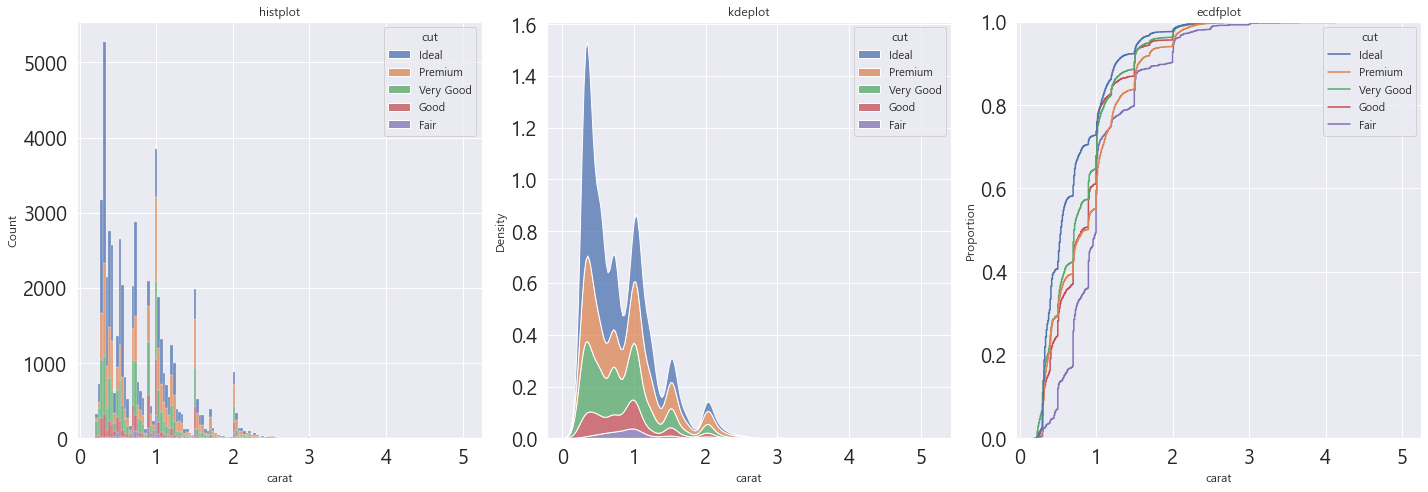

In [302]:
plt.close('all');
# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")
diamonds.head()

# plot
fig, axes = plt.subplots(ncols=3, figsize=(20,7))
sns.histplot(data=diamonds, x="carat", hue="cut", multiple="stack", ax=axes[0], legend=True)
sns.kdeplot(data=diamonds, x="carat", hue="cut", multiple="stack", ax=axes[1], legend=True)
sns.ecdfplot(data=diamonds, x="carat", hue="cut", ax=axes[2], legend=True)

axes[0].set_title("histplot")
axes[1].set_title("kdeplot")
axes[2].set_title("ecdfplot")

fig.tight_layout()

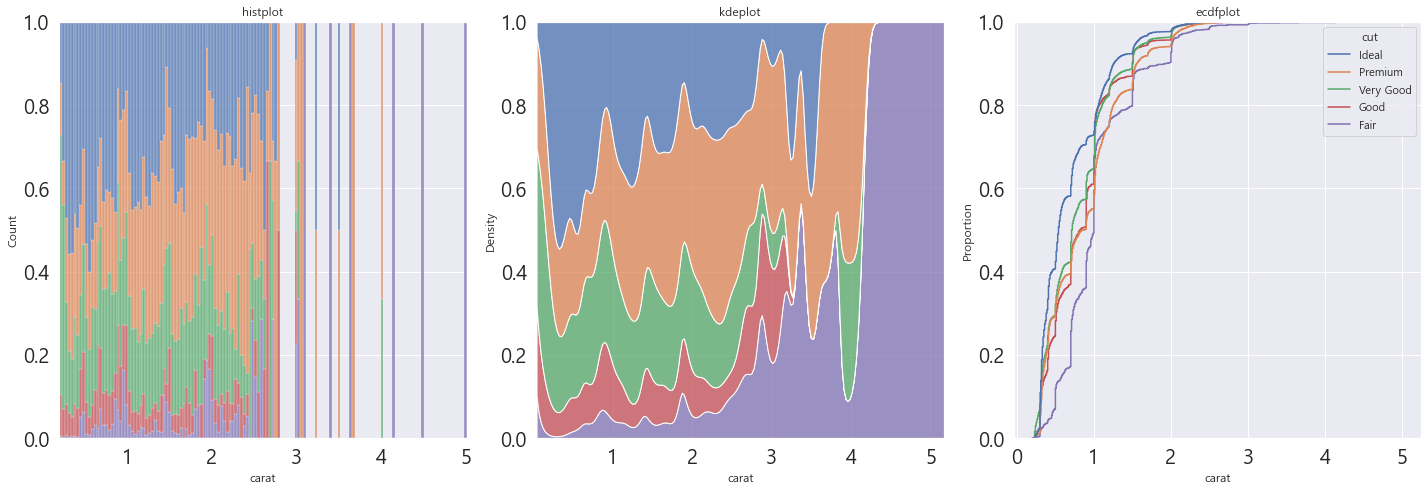

In [303]:
fig, axes = plt.subplots(ncols=3, figsize=(20,7))
sns.histplot(data=diamonds, x="carat", hue="cut", multiple="fill", ax=axes[0], legend=False)
sns.kdeplot(data=diamonds, x="carat", hue="cut", multiple="fill", ax=axes[1], legend=False)
sns.ecdfplot(data=diamonds, x="carat", hue="cut", ax=axes[2], legend=True)

axes[0].set_title("histplot")
axes[1].set_title("kdeplot")
axes[2].set_title("ecdfplot")

fig.tight_layout()

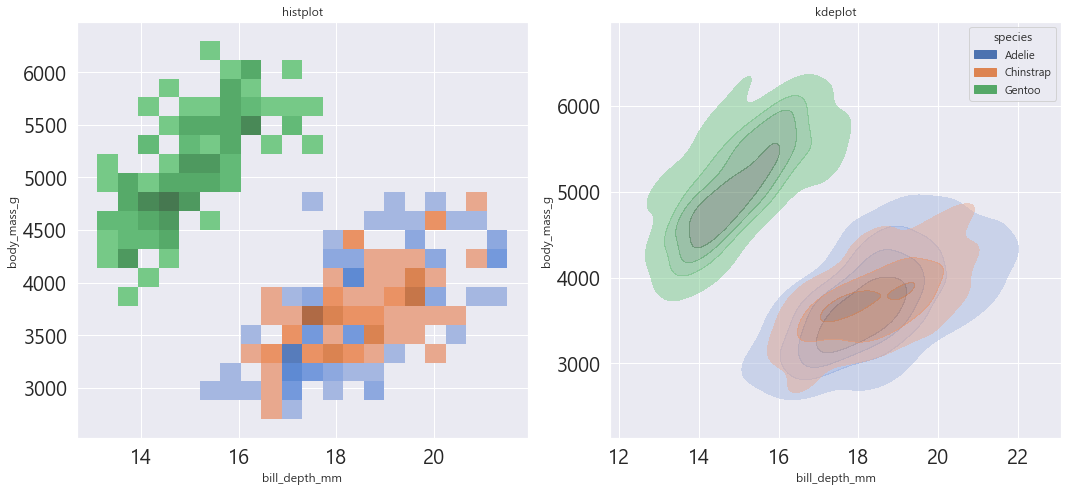

In [304]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")
penguins.head()

fig, axes = plt.subplots(ncols=2, figsize=(15,7))
sns.histplot(data=penguins, x="bill_depth_mm", y="body_mass_g", hue="species", 
             bins=20, ax=axes[0], legend=False)
sns.kdeplot(data=penguins, x="bill_depth_mm", y="body_mass_g", hue="species", 
            fill=True, levels=5, alpha=0.5,
            ax=axes[1], legend=True)

axes[0].set_title("histplot")
axes[1].set_title("kdeplot")

fig.tight_layout()

In [324]:
gn_total = vgame_4[['Genre','Year','Total_Sales']];

pivot = pd.DataFrame.pivot_table(gn_total,index='Genre',columns='Year',values='Total_Sales', aggfunc = 'mean');
pivot = pivot.T;
pivot.head()

group = gn_total.groupby(['Genre', 'Year']).mean()
group.head(20)

Total_Sales
Genre  Year              
Action 1980  3.400000e+05
       1981  5.916000e+05
       1982  3.611111e+05
       1983  4.085714e+05
       1984  1.850000e+06
       1985  1.760000e+06
       1986  2.290000e+06
       1987  5.550000e+05
       1988  8.700000e+05
       1989  1.606667e+06
       1990  2.130000e+06
       1991  1.352000e+06
       1992  3.840000e+06
       1993  3.016667e+05
       1994  3.875000e+05
       1995  4.471429e+05
       1996  1.030000e+06
       1997  9.386207e+05
       1998  8.956818e+05
       1999  7.082051e+05

In [ ]:
melt = gn_total.melt(id_vars=['Year','Genre']);

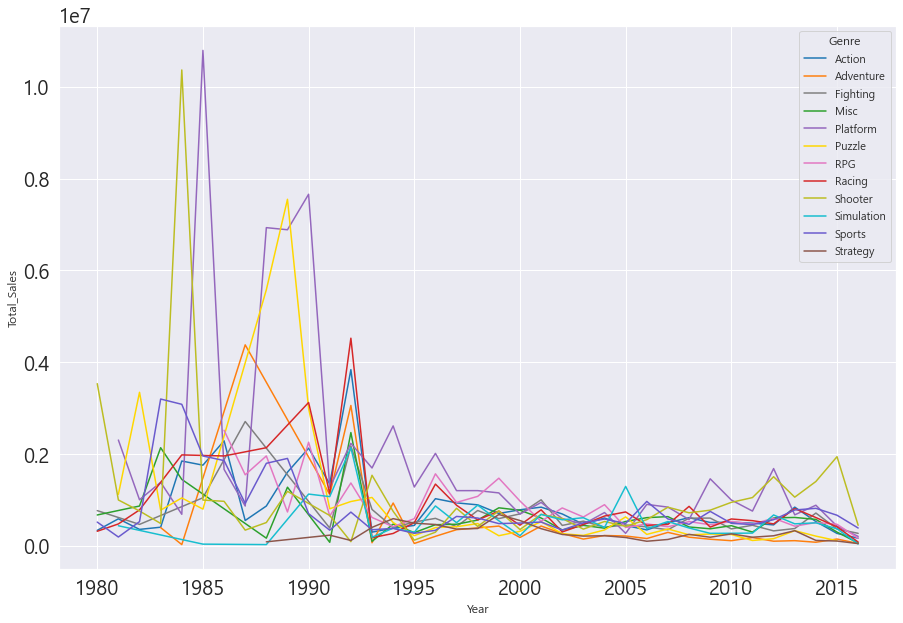

In [325]:
plt.close('all');
plt.figure(figsize=(15,10));
sns.lineplot(
    data=group,
    x='Year',
    y='Total_Sales',
    hue='Genre',
    palette=colors
);

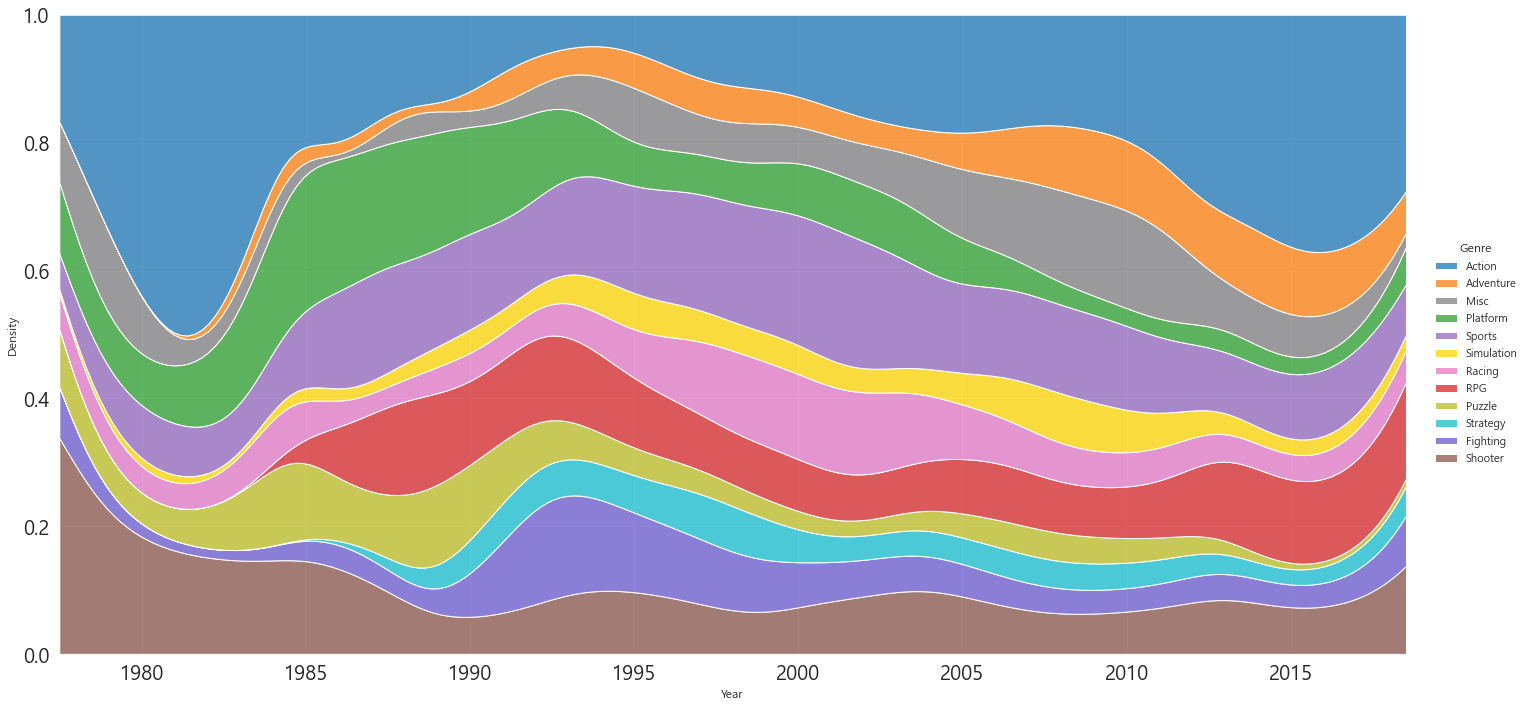

In [306]:

sns.displot(
    data=melt,
    x='Year',
    hue='Genre',
    kind="kde", 
    multiple="fill", clip=(0, None),
    # palette="ch:rot=-.25,hue=1,light=.75",
    palette=colors,
    height=10, aspect=2
    )



<AxesSubplot:xlabel='carat', ylabel='Density'>

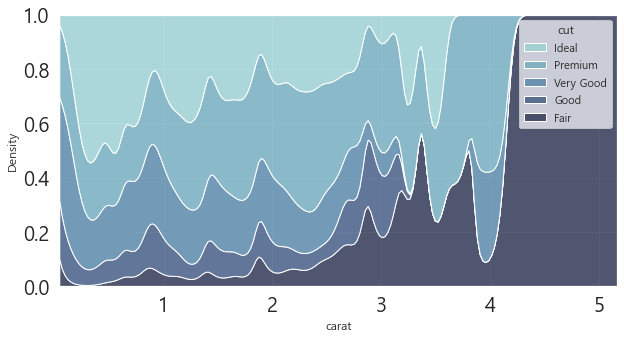

In [307]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(
    data=diamonds,
    x="carat", hue="cut",
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
    ax=ax
)

In [308]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
